In [38]:
import pandas as pd
import numpy as np
import seaborn as sns

In [39]:
a  = pd.read_csv(r"C:\akshay\House_price_Prediction Kaggle\train.csv")
b = pd.read_csv(r"C:\akshay\House_price_Prediction Kaggle\test.csv")

In [40]:
print("The shape of train data",a.shape[0], "Houses" ,"and" ,a.shape[1], "Features")
print("The shape of test data", b.shape[0], "Houses", "and" ,b.shape[1], "Feature")

The shape of train data 1460 Houses and 81 Features
The shape of test data 1459 Houses and 80 Feature


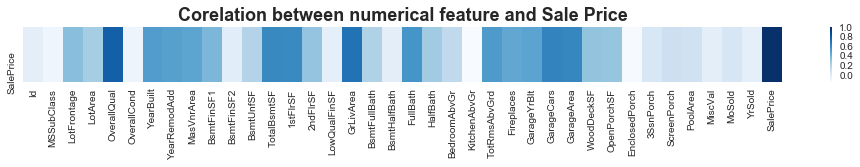

In [41]:
import matplotlib.pyplot as plt
#%matplotlib inline
#from scipy.stats import norm
#from sklearn.preprocessing import StandardScaler
from scipy import stats
num = a.select_dtypes(exclude = "object")
numcorr = num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by = ["SalePrice"], ascending=False).head(1),cmap = "Blues")
plt.title("Corelation between numerical feature and Sale Price", weight = "bold" , fontsize  = 18)
plt.show()


In [5]:
Num = numcorr["SalePrice"].sort_values(ascending= False).head(10).to_frame()
cm = sns.light_palette("cyan", as_cmap=True)
s = Num.style.background_gradient(cmap = cm)
s

#we have finding the variables having more correlation between the sales price and numberical variable
# from the below table we have conclude that overall quality,living area,garage area,garage car are highly corelated with sales price

,SalePrice
SalePrice,1
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


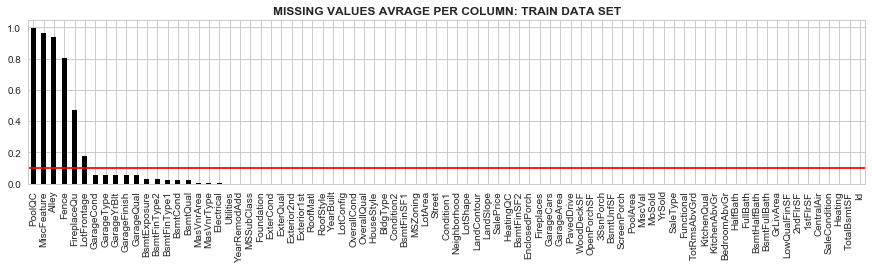

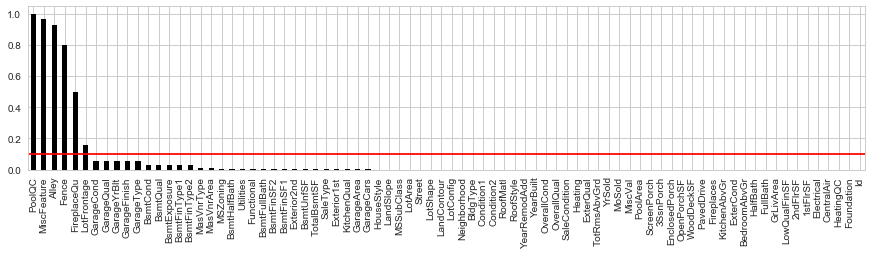

In [42]:
plt.style.use("seaborn")
sns.set_style("whitegrid")
plt.subplots(0,0,figsize=(15,3))
a.isnull().mean().sort_values(ascending = False).plot.bar(color = "black")
plt.axhline(y =0.1,color = "red" ,linestyle = "-")
plt.title("MISSING VALUES AVRAGE PER COLUMN: TRAIN DATA SET", Weight = "bold")
plt.show()

plt.subplots(0,0,figsize=(15,3))
b.isnull().mean().sort_values(ascending = False).plot.bar(color = "black")
plt.axhline(y =0.1,color = "red" ,linestyle = "-")
plt.show()


We combine first the train and test datasets to run all the data munging and feature engineering on both of them.

In [43]:
na = a.shape[0]
nb =  b.shape[0]

y_a = a["SalePrice"].to_frame()
y_a

#combine Test and train data

T = pd.concat((a,b), sort = False).reset_index(drop = True)

#drop taget and id variable from data

T.drop(["SalePrice"],axis = 1, inplace = True)
T.drop(["Id"],axis = 1, inplace = True)

print("Total size of :",T.shape)

Total size of : (2919, 79)


Data Cleaning

In [44]:
T1 = T.dropna(thresh = len(T)*0.9, axis =1) 
print("we have drop:",T.shape[1]-T1.shape[1],"Feature from the combbined dataset")

we have drop: 6 Feature from the combbined dataset


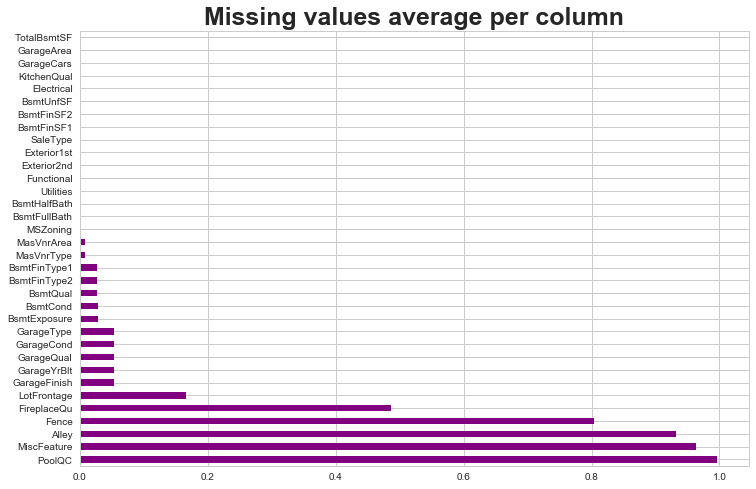

The shape of the combined dataset after dropping features with more than 90% M.V. (2919, 79)


In [47]:
allna = (T.isnull().sum() / len(T))
allna = allna.drop(allna[allna == 0].index).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
allna.plot.barh(color='purple')
plt.title('Missing values average per column', fontsize=25, weight='bold' )
plt.show()

print('The shape of the combined dataset after dropping features with more than 90% M.V.', T.shape)

In [49]:
NA=T[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt','BsmtFinType2','BsmtFinType1','BsmtCond', 'BsmtQual','BsmtExposure', 'MasVnrArea','MasVnrType','Electrical','MSZoning','BsmtFullBath','BsmtHalfBath','Utilities','Functional','Exterior1st','BsmtUnfSF','Exterior2nd','TotalBsmtSF','GarageArea','GarageCars','KitchenQual','BsmtFinSF2','BsmtFinSF1','SaleType']]


In [50]:
#We are splitting cat and numerical variable from data set

Tcat = NA.select_dtypes(include = "object")
Tnum = NA.select_dtypes(exclude = "object" )

print("we have",Tcat.shape, "categorical variable")
print("we have",Tnum.shape, "numerical variable")

we have (2919, 18) categorical variable
we have (2919, 10) numerical variable


In [51]:
Tnum.isnull().sum().sort_values(ascending = False).head(3)

GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
dtype: int64

In [74]:
T["LotFrontage"] = T.LotFrontage.fillna(0)
T["GarageYrBlt"] = T.GarageYrBlt.fillna(1980)
T["MasVnrArea"] = T.MasVnrArea.fillna(0)


In [53]:
Tcat.head()

,GarageType,GarageFinish,GarageQual,GarageCond,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtExposure,MasVnrType,Electrical,MSZoning,Utilities,Functional,Exterior1st,Exterior2nd,KitchenQual,SaleType
0,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,No,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD
1,Attchd,RFn,TA,TA,Unf,ALQ,TA,Gd,Gd,None,SBrkr,RL,AllPub,Typ,MetalSd,MetalSd,TA,WD
2,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,Mn,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD
3,Detchd,Unf,TA,TA,Unf,ALQ,Gd,TA,No,None,SBrkr,RL,AllPub,Typ,Wd Sdng,Wd Shng,Gd,WD
4,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,Av,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD


In [54]:
Tcat.isnull().sum().sort_values(ascending = False)

GarageFinish    159
GarageQual      159
GarageCond      159
GarageType      157
BsmtCond         82
BsmtExposure     82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MasVnrType       24
MSZoning          4
Utilities         2
Functional        2
Electrical        1
KitchenQual       1
Exterior1st       1
Exterior2nd       1
SaleType          1
dtype: int64

In [55]:
#We start with features having just few missing value:  We fill the gap with forward fill method:
T['Electrical']=T['Electrical'].fillna(method='ffill')
T['SaleType']=T['SaleType'].fillna(method='ffill')
T['KitchenQual']=T['KitchenQual'].fillna(method='ffill')
T['Exterior1st']=T['Exterior1st'].fillna(method='ffill')
T['Exterior2nd']=T['Exterior2nd'].fillna(method='ffill')
T['Functional']=T['Functional'].fillna(method='ffill')
T['Utilities']=T['Utilities'].fillna(method='ffill')
T['MSZoning']=T['MSZoning'].fillna(method='ffill')

In [56]:
#Categorical missing values
NAcols=T.columns
for col in NAcols:
    if T[col].dtype == "object":
        T[col] = T[col].fillna("None")

In [57]:
#Numerical missing values
for col in NAcols:
    if T[col].dtype != "object":
        T[col]= T[col].fillna(0)

In [58]:
T.isnull().sum().sort_values(ascending = False).head(2)

SaleCondition    0
Foundation       0
dtype: int64

In [59]:
##LABEL ENCODING BLOCK

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for x in Tcat:
    T[x]=le.fit_transform(T[x])
    
T.head()
    

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,Pave,None,Reg,Lvl,0,Inside,...,0,0,None,None,None,0,2,2008,8,Normal
1,20,3,80.0,9600,Pave,None,Reg,Lvl,0,FR2,...,0,0,None,None,None,0,5,2007,8,Normal
2,60,3,68.0,11250,Pave,None,IR1,Lvl,0,Inside,...,0,0,None,None,None,0,9,2008,8,Normal
3,70,3,60.0,9550,Pave,None,IR1,Lvl,0,Corner,...,0,0,None,None,None,0,2,2006,8,Abnorml
4,60,3,84.0,14260,Pave,None,IR1,Lvl,0,FR2,...,0,0,None,None,None,0,12,2008,8,Normal


In [60]:
Train = T[:na]
test = T[na:]

print("shape of trainig data is:",Train.shape)
print("shape of testing data is:",test.shape)

shape of trainig data is: (1460, 79)
shape of testing data is: (1459, 79)


(1460, 81)
(1445, 81)


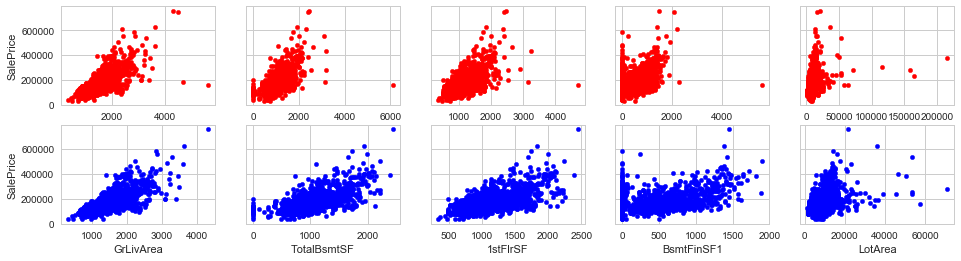

In [61]:
#Detecting Outlier

fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(16, 4))
axes = np.ravel(axes)

col_name = ['GrLivArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1','LotArea']

for i, c in zip(range(5), col_name):
    a.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='r')
    
    # delete outliers
print(a.shape)
a = a[a['GrLivArea'] < 4500]
a = a[a['LotArea'] < 100000]
a = a[a['TotalBsmtSF'] < 3000]
a = a[a['1stFlrSF'] < 2500]
a = a[a['BsmtFinSF1'] < 2000]

print(a.shape)


for i, c in zip(range(5,10), col_name):
    a.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='b')

In [62]:
a["GrLivArea"].sort_values(ascending= False).head(2)

691     4316
1169    3627
Name: GrLivArea, dtype: int64

In [63]:
#a["LotArea"].sort_values(ascending = False).head(2)

In [64]:
a["TotalBsmtSF"].sort_values(ascending = False).head(1)

691    2444
Name: TotalBsmtSF, dtype: int64

In [65]:
a["1stFlrSF"].sort_values(ascending = False).head(1)

691    2444
Name: 1stFlrSF, dtype: int64

In [66]:
train=Train[(Train['GrLivArea'] < 4600) & (Train['MasVnrArea'] < 1500)]
print('We removed ',Train.shape[0]- train.shape[0],'outliers')
train.head()

We removed  3 outliers


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,Pave,None,Reg,Lvl,0,Inside,...,0,0,None,None,None,0,2,2008,8,Normal
1,20,3,80.0,9600,Pave,None,Reg,Lvl,0,FR2,...,0,0,None,None,None,0,5,2007,8,Normal
2,60,3,68.0,11250,Pave,None,IR1,Lvl,0,Inside,...,0,0,None,None,None,0,9,2008,8,Normal
3,70,3,60.0,9550,Pave,None,IR1,Lvl,0,Corner,...,0,0,None,None,None,0,2,2006,8,Abnorml
4,60,3,84.0,14260,Pave,None,IR1,Lvl,0,FR2,...,0,0,None,None,None,0,12,2008,8,Normal


In [67]:
target=a[['SalePrice']]
target.loc[691]

SalePrice    755000
Name: 691, dtype: int64

In [68]:
target.loc[1169]

SalePrice    625000
Name: 1169, dtype: int64

In [69]:
pos=[1169,691,451]
target.drop(target.index[pos], inplace = True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [73]:
print('We make sure that both train and target sets have the same row number after removing the outliers:')
print( 'Train: ',train.shape[0], 'rows')
print('Target:', target.shape[0],'rows')

train.head()
target.head()

We make sure that both train and target sets have the same row number after removing the outliers:
Train:  1457 rows
Target: 1442 rows


,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

In [34]:
x=train
y=np.array(target)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .33, random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [1457, 1442]